In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np


df80 = pd.read_csv('stave_Samples.csv')
df3000 = pd.read_csv('3000.csv')

df64209= df80[df80['pingNum'] == 64209 ]
df64209 = df64209[df64209['channel']%2 == 0]
df64209 = df64209.reset_index()
df64209 = df64209.drop(['index'], axis=1)

df64209 = df64209.groupby(np.arange(len(df64209))//119.925).mean()
inputDF = df64209[['sample']]

df64210= df80[df80['pingNum'] == 64209 ]
df64210 = df64210[df64210['channel']%2 == 0]
df64210 = df64210.reset_index()
df64210 = df64210.drop(['index'], axis=1)
df64210 = df64210.groupby(np.arange(len(df64210))//119.925).mean()


inputDF
# inputDF = df64209[['sample']]


df_binned_64209 = df3000[['PingKey','Channel','TWTT','nuAngle']]
df_binned_64209 = df_binned_64209[df_binned_64209['PingKey'] == 64209 ]
df_binned_64209 = df_binned_64209[df_binned_64209['Channel'] == 0]
df_binned_64209 = df_binned_64209.reset_index()
df_binned_64209 = df_binned_64209.drop(['index'], axis=1)



outputDF = df_binned_64209[['TWTT','nuAngle']]
outputDF
# inputDF = df[['altitude']]

# dateDF = df[['dateTime']]
# outputDF = df[['TWTT','nuAngle','headings','heaves','pitch','roll']]
# df80

,TWTT,nuAngle
0,0.017260,0.186
1,0.017253,0.216
2,0.017238,0.630
3,0.017223,1.488
4,0.017240,2.334
...,...,...
395,0.055646,69.120
396,0.055812,69.210
397,0.055966,69.264
398,0.056116,69.294


In [47]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# import numpy as np


# df80 = pd.read_csv('stave_Samples.csv')
# df3000 = pd.read_csv('3000.csv')

# inputDF = df[['altitude']]

# # dateDF = df[['dateTime']]
# outputDF = df[['TWTT','nuAngle','headings','heaves','pitch','roll']]



sc = StandardScaler()
inputScaled = sc.fit_transform(inputDF)


sc2 = StandardScaler()

outputScaled = sc2.fit_transform(outputDF)







inTrain = np.array(inputScaled)
outTrain = np.array(outputScaled)




print(outTrain.shape)
print(inTrain.shape)

# inTrain = np.resize(inTrain, (623944, 1))

# inTrain = np.reshape(inputScaled, (inputScaled.shape[0], inputScaled.shape[1]))


# outTrain = np.reshape(outputScaled, (outputScaled.shape[0], outputScaled.shape[1]))

# inputTrain = np.array(inputTrain)
# outputTrain = np.array(outputTrain)
# inTrain.shape



# df
# inputDF

(400, 2)
(400, 1)


In [48]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout



In [93]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(400, 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=100))
model.add(Dropout(0.1))
model.add(Dense(units=2))
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')
model.fit(inputDF, outputDF, epochs=1000, batch_size=10)

Epoch 1/1000
40/40 [==============================] - 4s 3ms/step - loss: 104.3942
Epoch 2/1000
40/40 [==============================] - 0s 3ms/step - loss: 83.5935
Epoch 3/1000
40/40 [==============================] - 0s 3ms/step - loss: 81.6721
Epoch 4/1000
40/40 [==============================] - 0s 3ms/step - loss: 79.2029
Epoch 5/1000
40/40 [==============================] - 0s 3ms/step - loss: 72.6149
Epoch 6/1000
40/40 [==============================] - 0s 3ms/step - loss: 72.6471
Epoch 7/1000
40/40 [==============================] - 0s 3ms/step - loss: 72.8755
Epoch 8/1000
40/40 [==============================] - 0s 3ms/step - loss: 71.7418
Epoch 9/1000
40/40 [==============================] - 0s 3ms/step - loss: 72.6118
Epoch 10/1000
40/40 [==============================] - 0s 3ms/step - loss: 73.3724
Epoch 11/1000
40/40 [==============================] - 0s 3ms/step - loss: 71.4503
Epoch 12/1000
40/40 [==============================] - 0s 3ms/step - loss: 70.2846
Epoch 13/100

In [94]:
testdf = df64210[['sample']]

sc3 = StandardScaler()
testScaled = sc3.fit_transform(testdf)

test = np.array(testScaled)
print(test.shape)




predicted64210 = model.predict(test)



(400, 1)
13/13 [==============================] - 1s 3ms/step


In [95]:

newDF = pd.DataFrame(predicted64210, columns = ['TWTT','nuAngle'])
newDF


,TWTT,nuAngle
0,0.023942,5.424734
1,0.023185,3.649800
2,0.022708,2.420165
3,0.022462,1.855299
4,0.022899,2.900678
...,...,...
395,0.021438,0.271706
396,0.021434,0.267953
397,0.021393,0.226678
398,0.021376,0.210627


In [96]:

df_binned_64210 = df3000[['PingKey','Channel','TWTT','nuAngle']]

df_binned_64210 = df_binned_64210[df_binned_64210['PingKey'] == 64210 ]
df_binned_64210 = df_binned_64210[df_binned_64210['Channel'] == 0]
df_binned_64210 = df_binned_64210.reset_index()
df_binned_64210 = df_binned_64210.drop(['index'], axis=1)
output_for_64210 = df_binned_64210[['TWTT','nuAngle']]





df = output_for_64210

df



,TWTT,nuAngle
0,0.017231,0.444
1,0.017226,0.906
2,0.017230,1.452
3,0.017246,1.920
4,0.017258,2.226
...,...,...
395,0.055668,68.916
396,0.055766,68.958
397,0.055875,69.018
398,0.056012,69.096


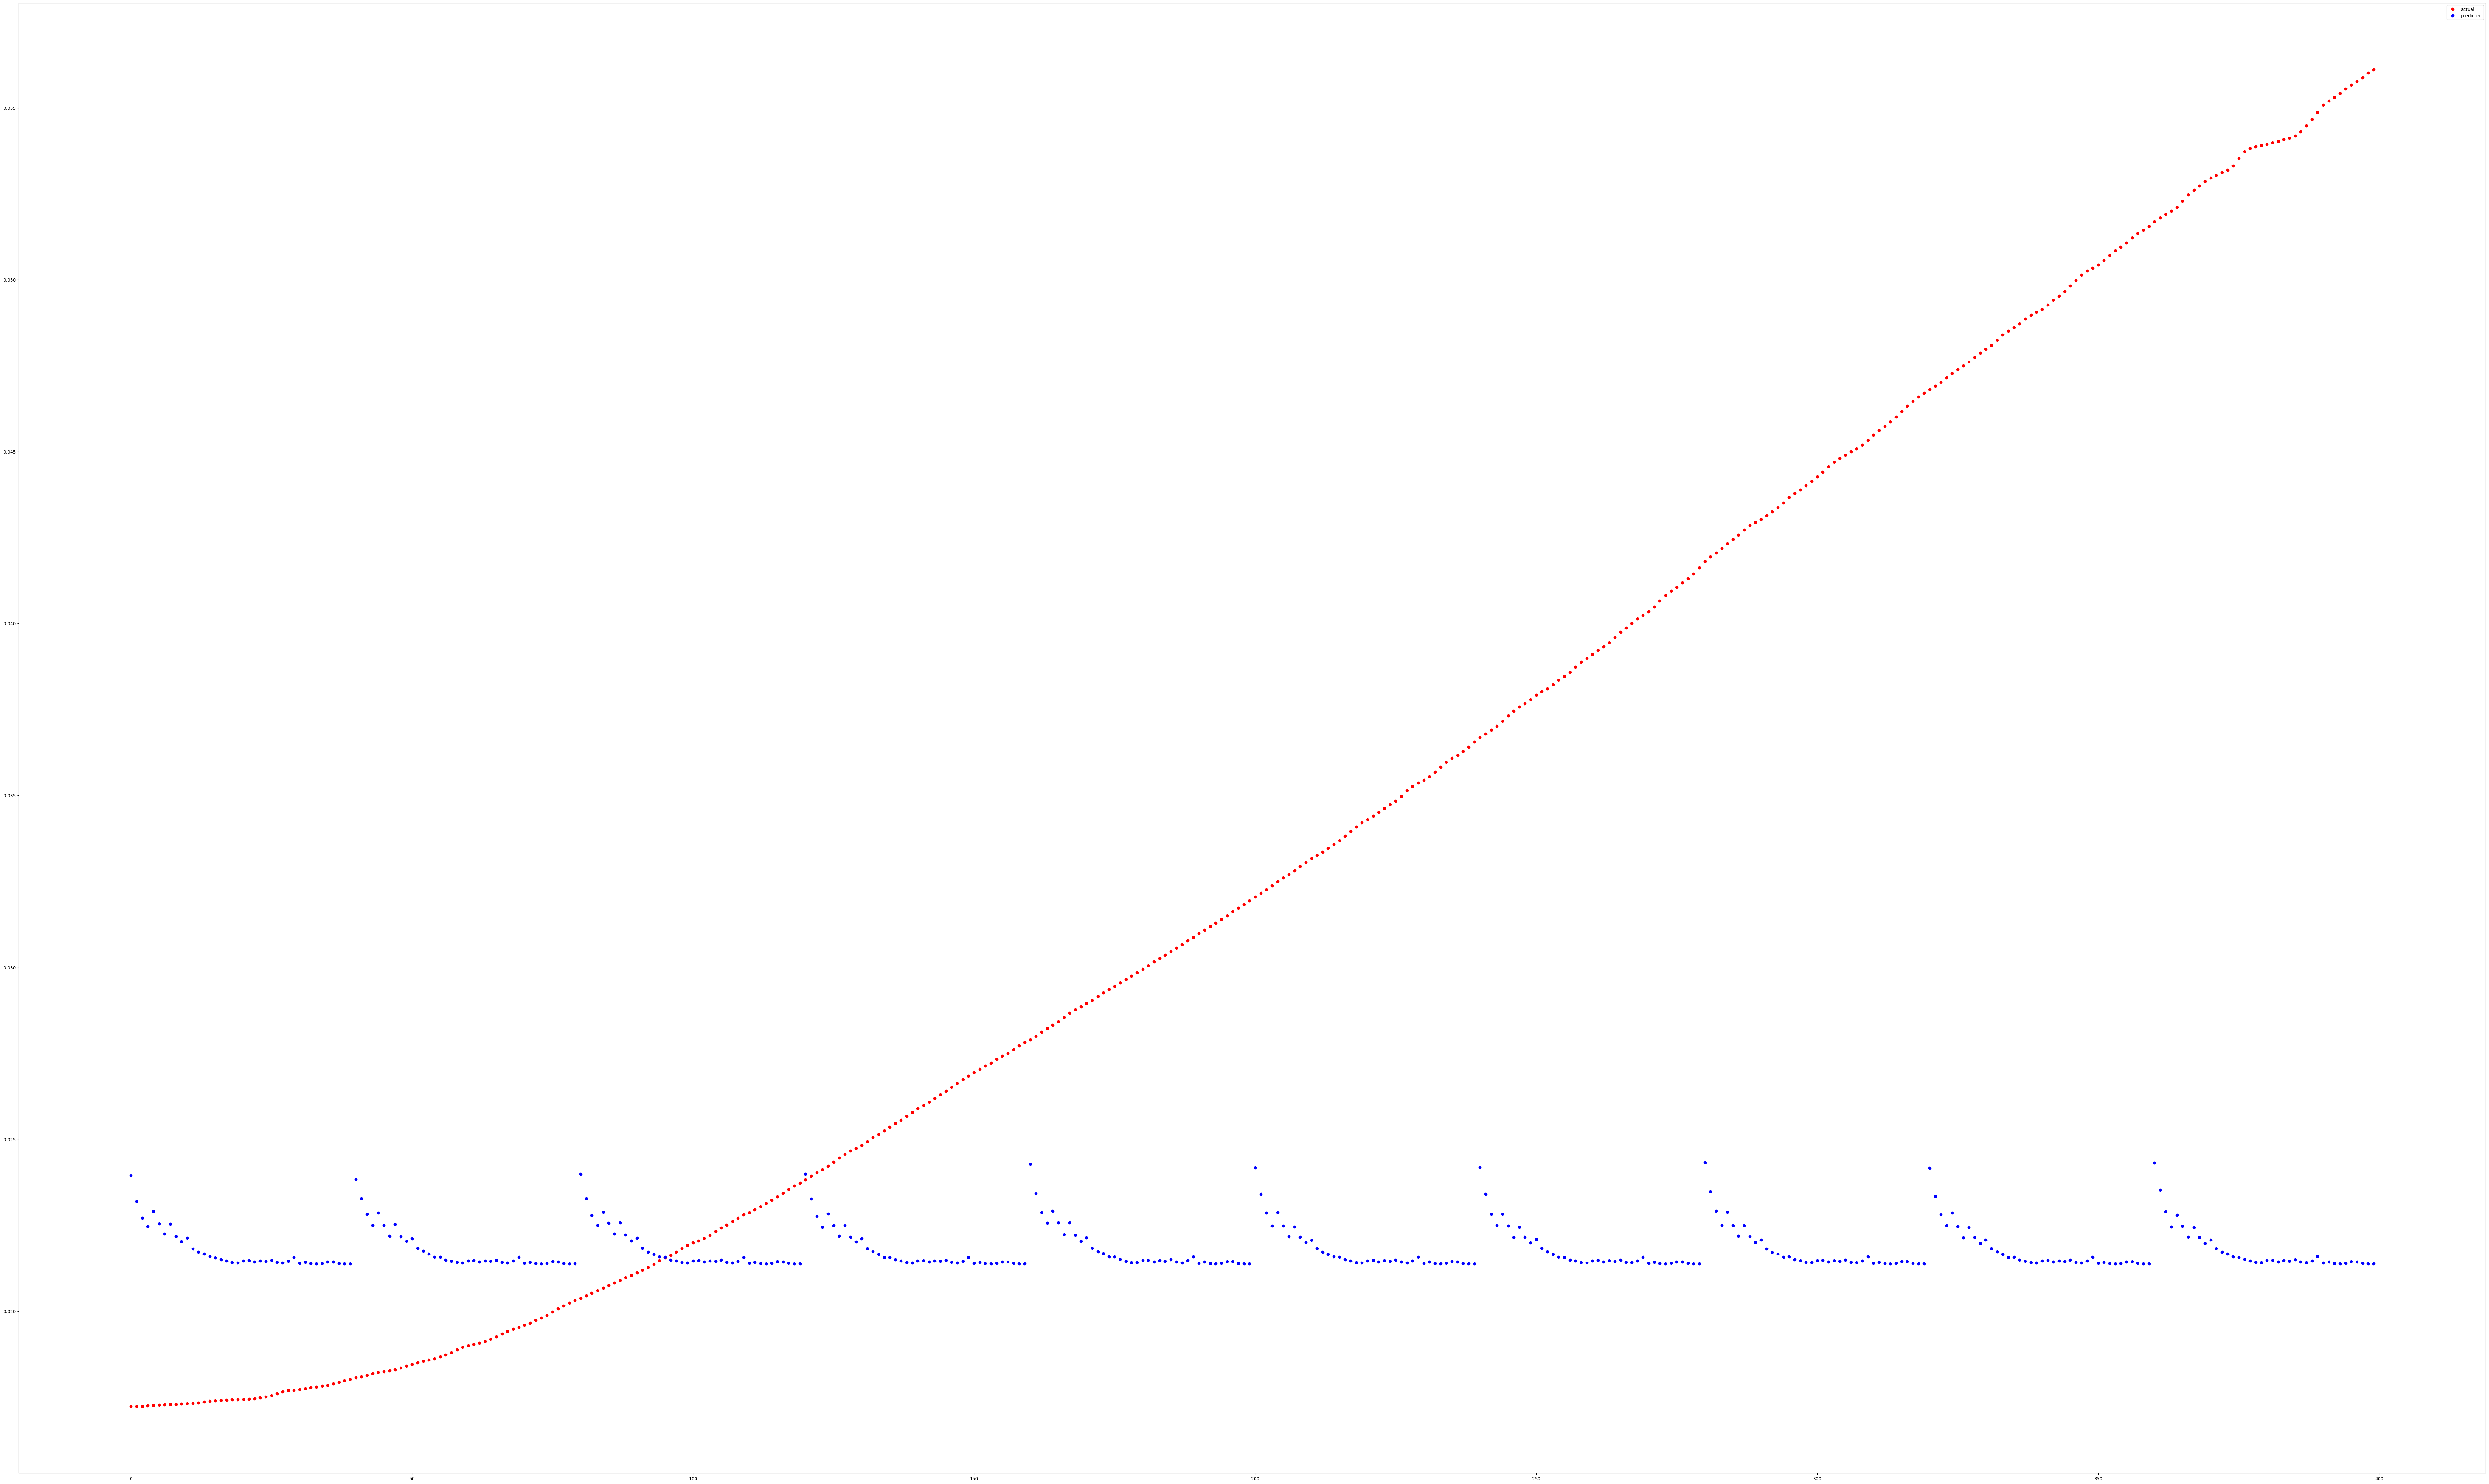

In [97]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(100, 60))
plt.plot(df['TWTT'], 'o' ,label = 'actual', color = 'red')
plt.plot(newDF['TWTT'], 'o',label = 'predicted', color = 'blue')
plt.legend()

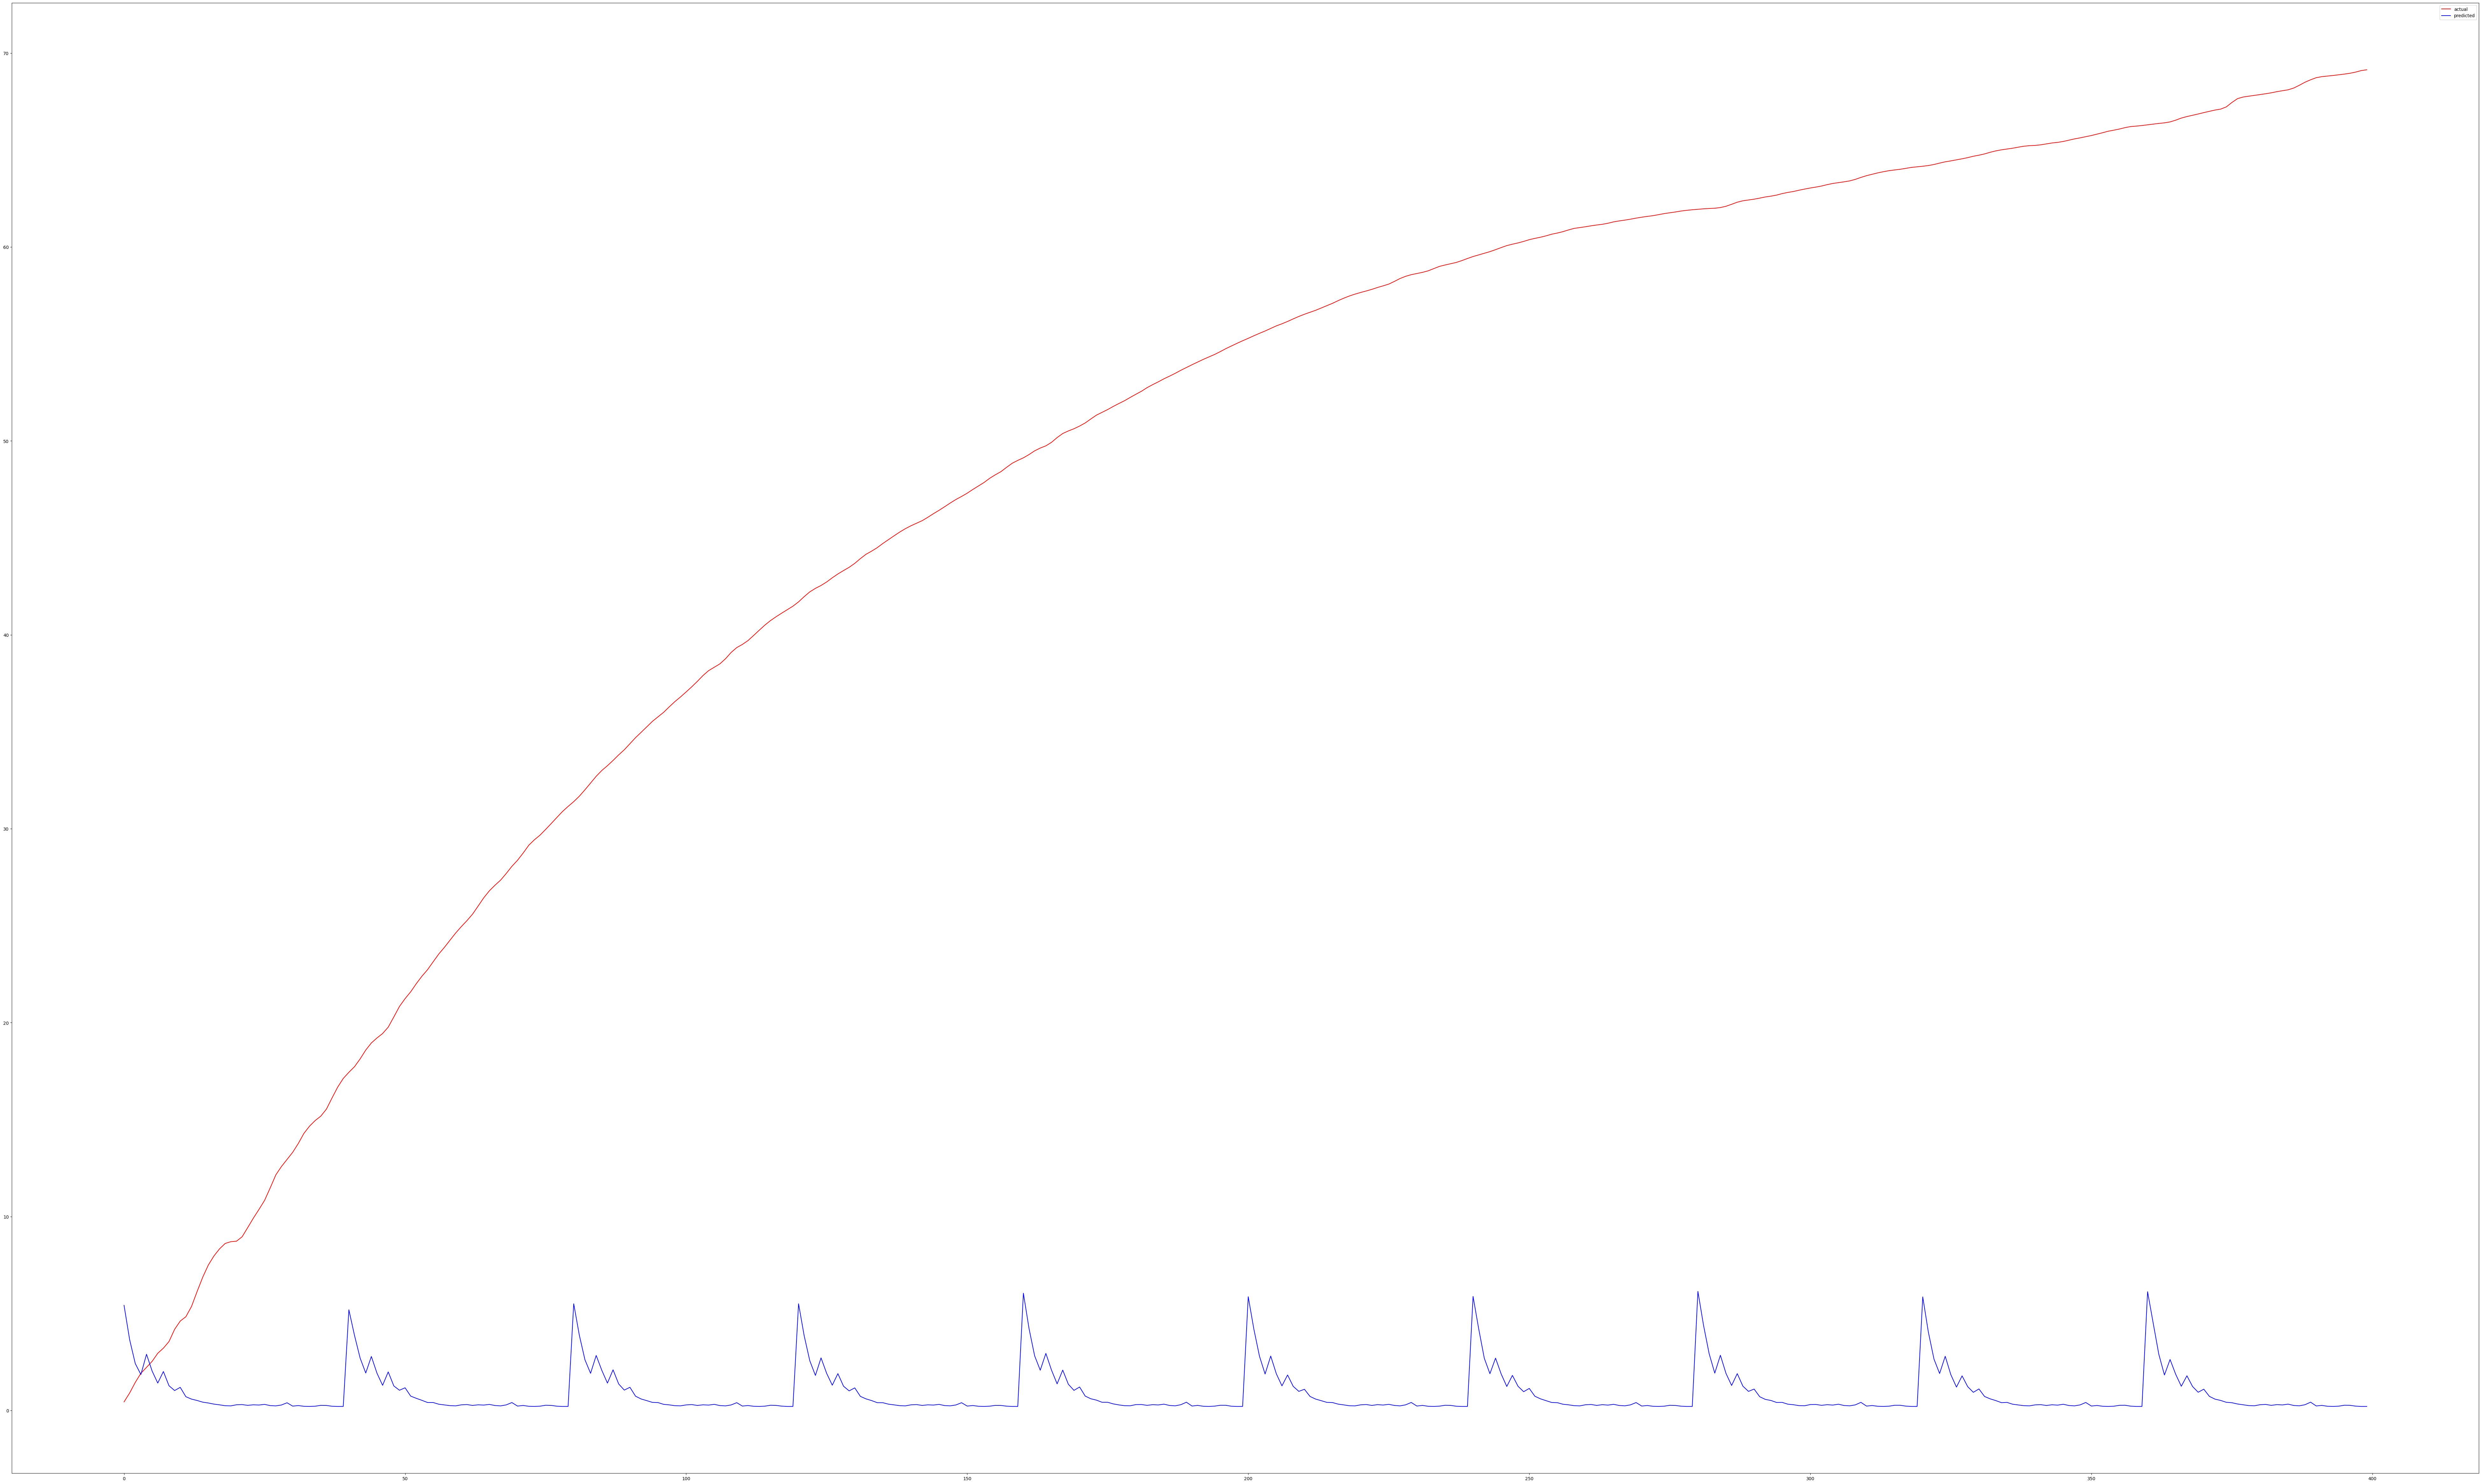

In [98]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(100, 60))
plt.plot(df['nuAngle'], label = 'actual', color = 'red')
plt.plot(newDF['nuAngle'], label = 'predicted', color = 'blue')
plt.legend()

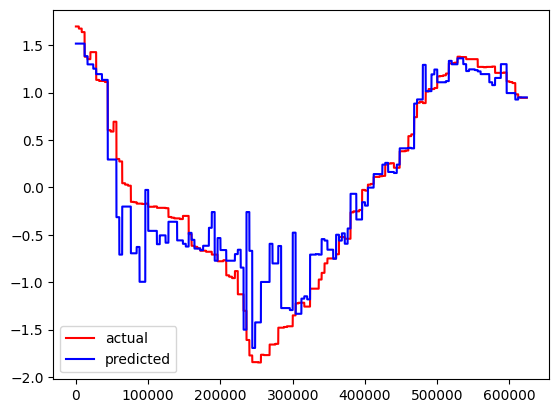

In [11]:
import matplotlib.pyplot as plt
plt.plot(df['headings'], label = 'actual', color = 'red')
plt.plot(newDF['headings'], label = 'predicted', color = 'blue')
plt.legend()

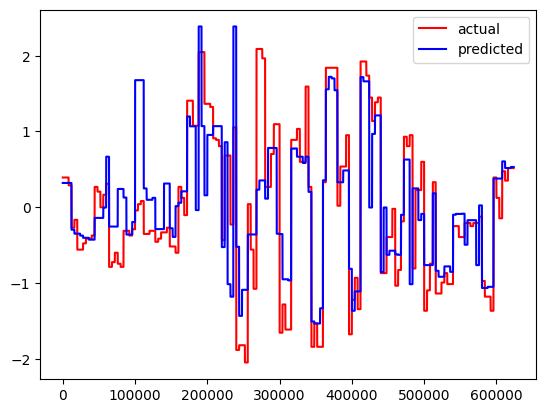

In [12]:
import matplotlib.pyplot as plt
plt.plot(df['pitch'], label = 'actual', color = 'red')
plt.plot(newDF['pitch'], label = 'predicted', color = 'blue')
plt.legend()

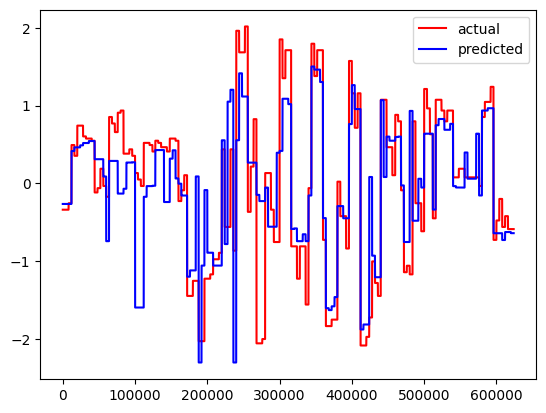

In [13]:
import matplotlib.pyplot as plt
plt.plot(df['heaves'], label = 'actual', color = 'red')
plt.plot(newDF['heaves'], label = 'predicted', color = 'blue')
plt.legend()

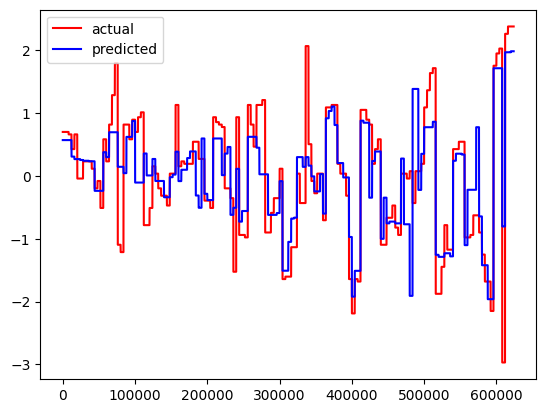

In [14]:
import matplotlib.pyplot as plt
plt.plot(df['roll'], label = 'actual', color = 'red')
plt.plot(newDF['roll'], label = 'predicted', color = 'blue')
plt.legend()